In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from qutip import (about, basis, destroy, mesolve, ptrace, qeye,
                   tensor, wigner, anim_wigner)
# set a parameter to see animations in line
from matplotlib import rc
rc('animation', html='jshtml')

%matplotlib inline

## はじめに
Jaynes-Cummingsモデルのシミュレーション
Jaynes-Cummingsモデルは光と物質の相互作用系の最もシンプルモデルである。

H=ℏωca†a+12ℏωaσz+ℏg(a†+a)(σ−+σ+)

回転波近似を行うと以下のハミルトニアンになる

回転波近似ではa†σ−とaσ+の項を無視する。これはキャビティと原子の共鳴周波数が十分近いときに成り立つ近似である。このとき、無視される項は高速に振動するため、時間平均を取ると0になる。

HRWA=ℏωca†a+12ℏωaσz+ℏg(a†σ−+aσ+)


In [31]:
wc = 1.0 * 2 * np.pi  # cavity frequency
wa = 1.0 * 2 * np.pi  # atom frequency
g = 0.05 * 2 * np.pi  # coupling strength
kappa = 0.005  # cavity dissipation rate
gamma = 0.05  # atom dissipation rate
N = 15  # number of cavity fock states
n_th_a = 0.0  # avg number of thermal bath excitation
use_rwa = True

tlist = np.linspace(0, 25, 101)

In [32]:
# intial state
psi0 = tensor(basis(N, 0), basis(2, 1))  # start with an excited atom

# operators
a = tensor(destroy(N), qeye(2))
sm = tensor(qeye(N), destroy(2))

# Hamiltonian
if use_rwa:
    H = wc * a.dag() * a + wa * sm.dag() * sm + \
        g * (a.dag() * sm + a * sm.dag())
else:
    H = wc * a.dag() * a + wa * sm.dag() * sm + \
        g * (a.dag() + a) * (sm + sm.dag())

In [33]:
c_ops = []

# cavity relaxation
rate = kappa * (1 + n_th_a)
if rate > 0.0:
    c_ops.append(np.sqrt(rate) * a)

# cavity excitation, if temperature > 0
rate = kappa * n_th_a
if rate > 0.0:
    c_ops.append(np.sqrt(rate) * a.dag())

# qubit relaxation
rate = gamma
if rate > 0.0:
    c_ops.append(np.sqrt(rate) * sm)

In [34]:
output = mesolve(H, psi0, tlist, c_ops, [a.dag() * a, sm.dag() * sm])

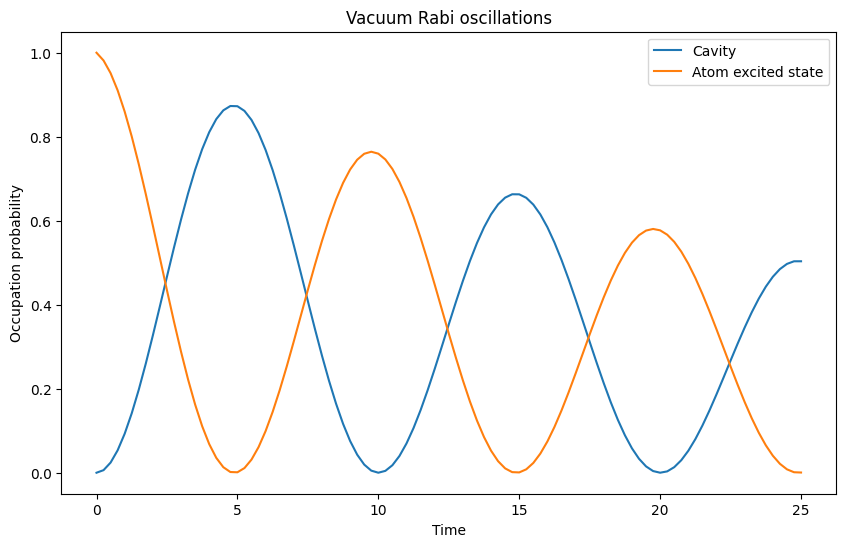

In [35]:
n_c = output.expect[0]
n_a = output.expect[1]

fig, axes = plt.subplots(1, 1, figsize=(10, 6))

axes.plot(tlist, n_c, label="Cavity")
axes.plot(tlist, n_a, label="Atom excited state")
axes.legend(loc=0)
axes.set_xlabel("Time")
axes.set_ylabel("Occupation probability")
axes.set_title("Vacuum Rabi oscillations");